In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(16719, 16)

In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Platforms with most games

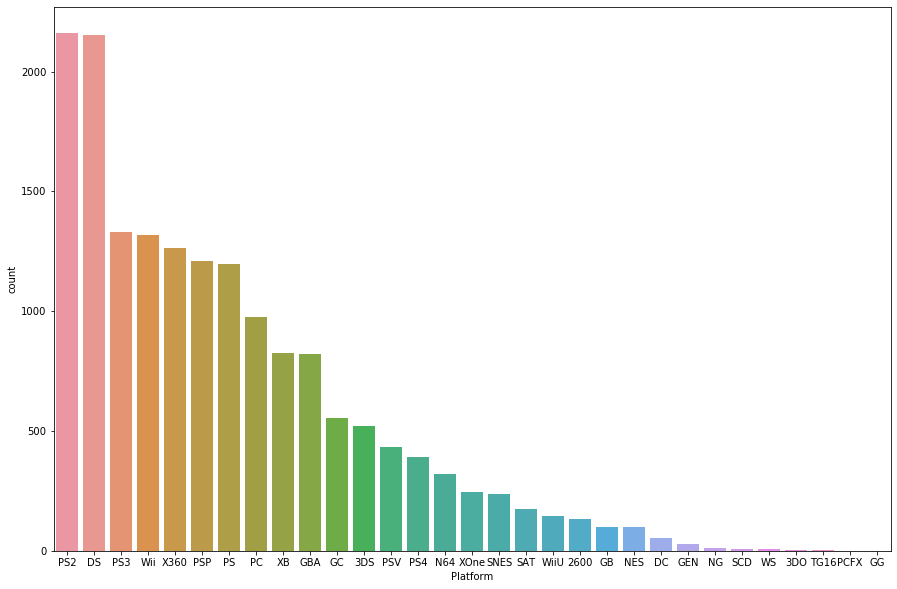

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x='Platform',data=df,order=df.Platform.value_counts().index)

# Genre with game counts

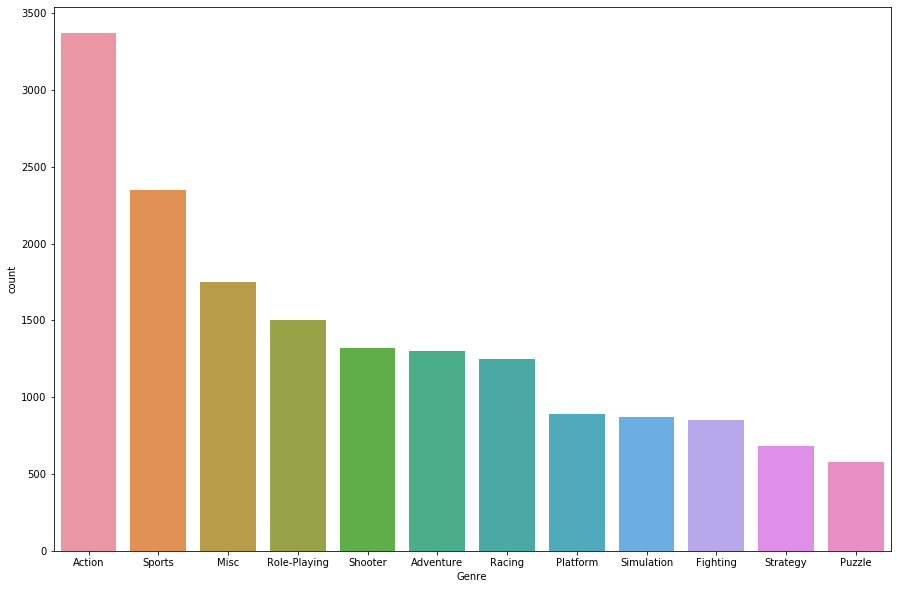

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre',data=df,order=df.Genre.value_counts().index)

# Publishers with most games

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

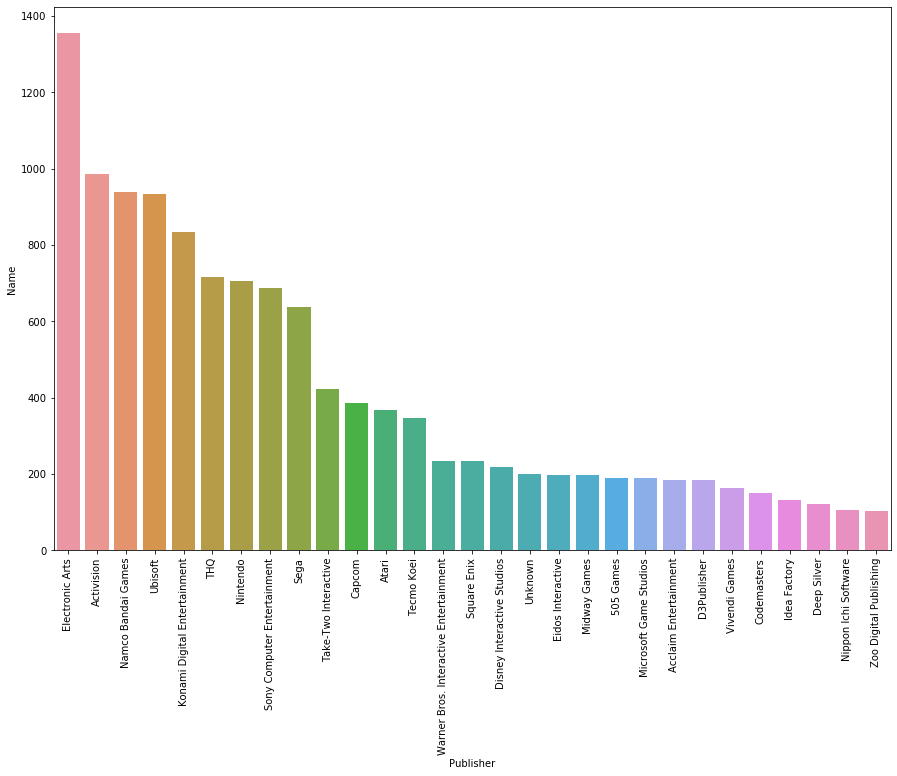

In [9]:
df1 = df.groupby('Publisher').agg('count')
df1.reset_index(inplace=True)
df1.sort_values(by=['Name'], inplace=True, ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Publisher', y='Name', data=df1[df1.Name>= 100])
plt.xticks(rotation=90)

# Developers with most games

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

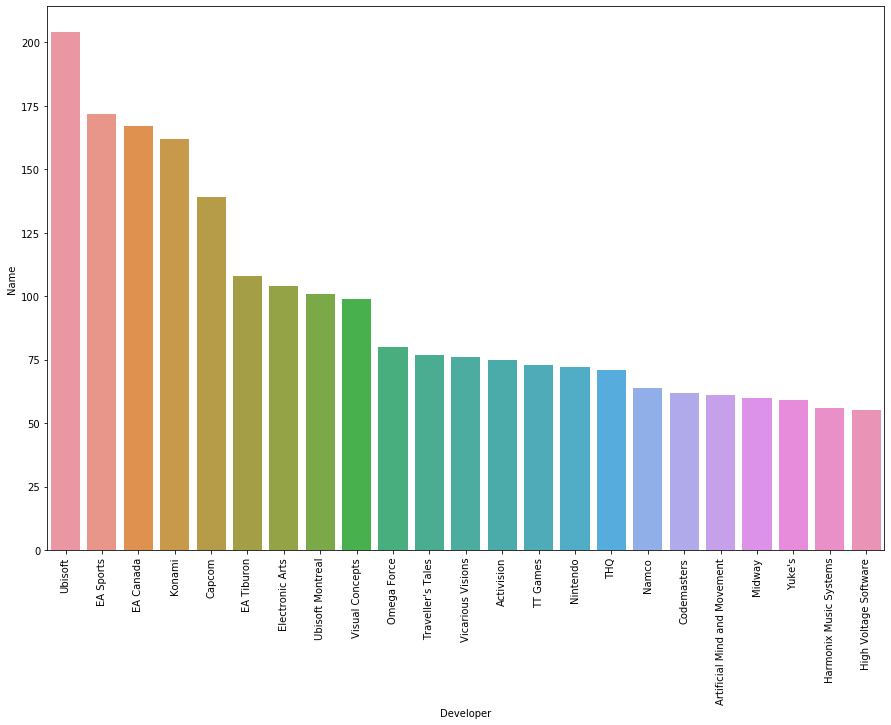

In [10]:
df2 = df.groupby('Developer').agg('count')
df2.reset_index(inplace=True)
df2.sort_values(by=['Name'], inplace=True, ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Developer',y='Name',data=df2[df2.Name>= 50])
plt.xticks(rotation=90)


# Correlations

In [11]:
# Conversion of categorical columns into numeric codes
cols= ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct=0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1
        
    for k,v in uniques_dict.items():
        df.loc[df[col]==k, col] = v


In [12]:
df1 = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

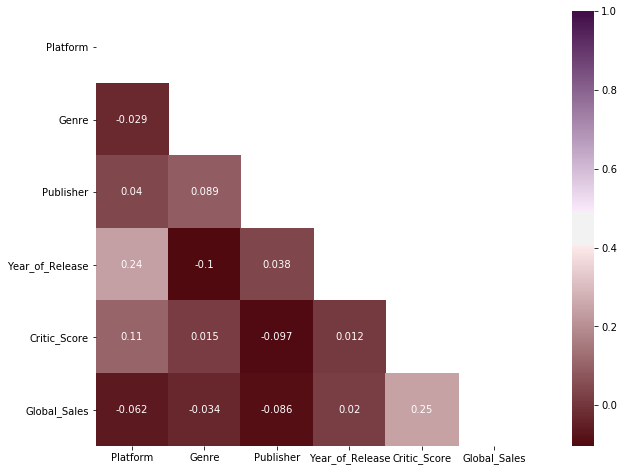

In [13]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20) 

fig, ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.heatmap(df1.corr(), annot=True, square=True, mask=mask, cmap=cmap)

In [14]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [15]:
dfh = df.dropna(subset=['Critic_Score']).reset_index(drop=True)
dfh['Score_group'] = dfh['Critic_Score'].apply(lambda x: score_group(x))

In [16]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

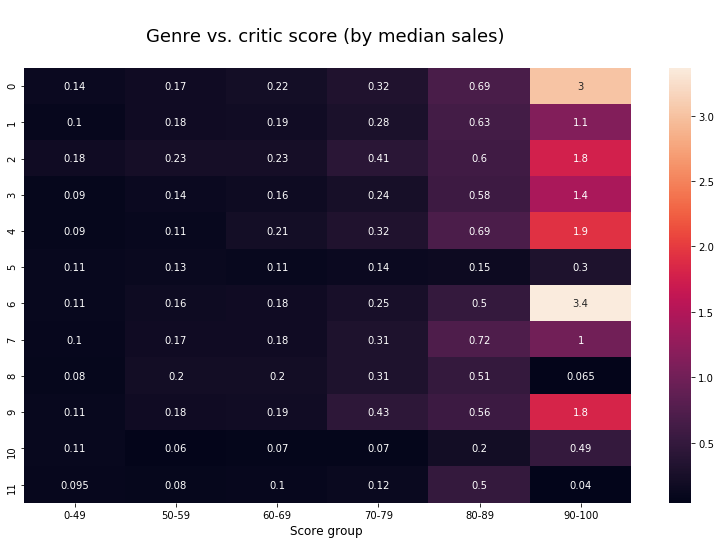

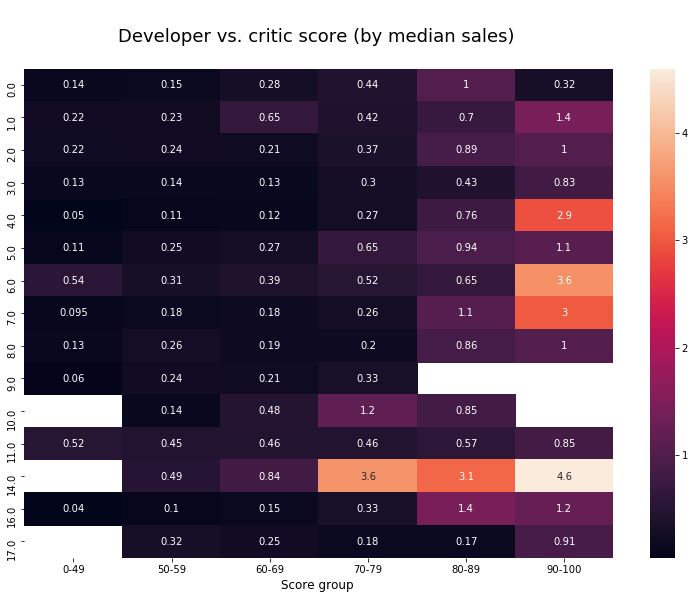

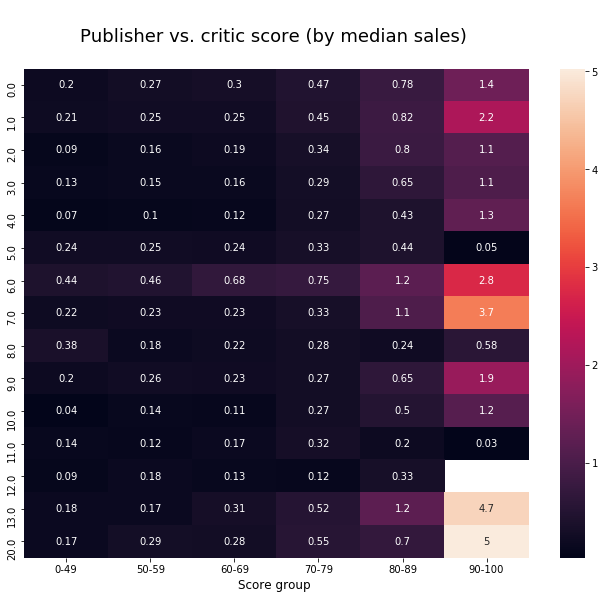

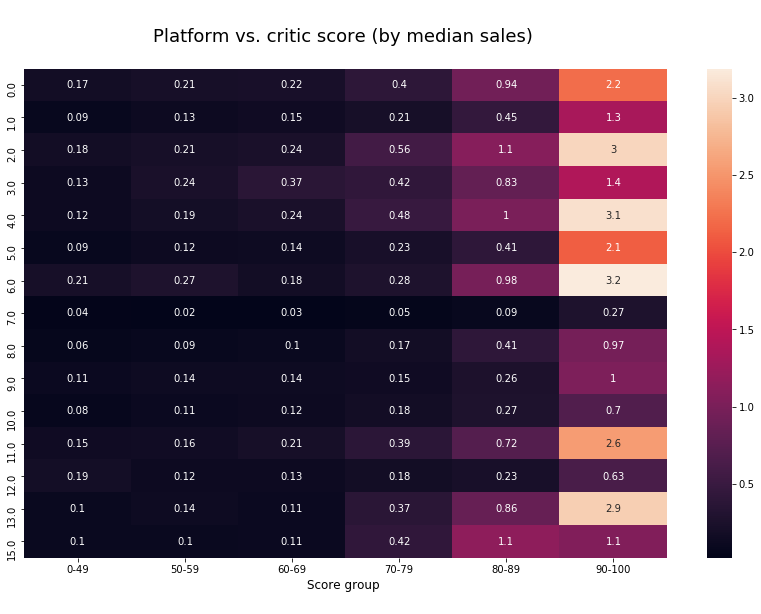

In [17]:
cols = ['Genre', 'Developer', 'Publisher', 'Platform']

for col in cols:
    pack=[]
    top = dfh[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    
    for x in top[col]:
        pack.append(x)
    
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col, 'Score_group',
                        'Global_Sales']].groupby([col,
                                                  'Score_group']).median().reset_index().pivot(col, 'Score_group', 'Global_Sales')
    
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(dfh_platform, annot=True).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []


[(0, 20)]

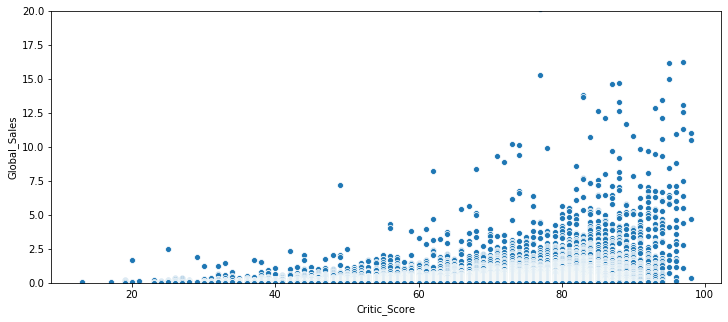

In [18]:
# Critic score vs Global sale
plt.figure(figsize=(12,5))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df1).set(ylim=(0,20))

[(0, 4), (50, 95)]

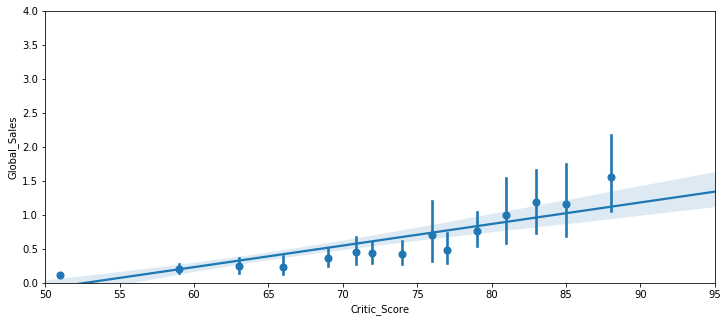

In [19]:
# to see better correlation
plt.figure(figsize=(12,5))
sns.regplot(x='Critic_Score',
            y='Global_Sales',
            data=df1.loc[df1.Year_of_Release>=2014],
           x_bins=15,
           truncate=True).set(ylim=(0,4), xlim=(50,95))

### Defining hits as those with sales above 1 million units
###### This will be the target in our prediction model, where we'll predict if a game will be a hit or not.

In [20]:
dfb = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [21]:
df2['Hit'] = df2['Hit'].apply(lambda x: 1 if x > 1 else 0)

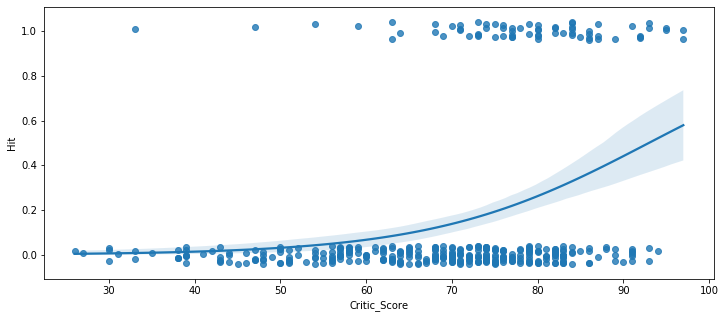

In [22]:
plt.figure(figsize=(12,5))
sns.regplot(x="Critic_Score", y="Hit",
            data=df2.sample(n=int(0.05*len(df2))),n_boot=500,
            y_jitter=.04, logistic=True)

## Prediction

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [29]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df = df.dropna().reset_index(drop=True)
df2 = df[['Platform','Genre', 'Publisher', 'Year_of_Release', 'Critic_Score', 'Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)
df2['Hit'] = df2['Hit'].apply(lambda x: 1 if x > 1 else 0)
df2.head()

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1


In [30]:
df_copy = pd.get_dummies(df2)
df_copy.head()

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2)

In [40]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=500,random_state=2).fit(X_train, y_train)
y_val_rfc = rfc.predict_proba(X_test)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_rfc).idxmax(axis=1).values
                                   == y_test)/len(y_test))

y_pred_rfc = rfc.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred_rfc))

Validation accuracy:  0.8502783474948725
F1 Score:  0.5228758169934641


In [37]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500,random_state=2).fit(X_train, y_train)
y_val_log = logreg.predict_proba(X_test)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_log).idxmax(axis=1).values
                                   == y_test)/len(y_test))

y_pred_log = logreg.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred_log))

Validation accuracy:  0.8417814239671843
F1 Score:  0.47058823529411764


Text(0.5, 1, 'Training Set Confusion Matrix')

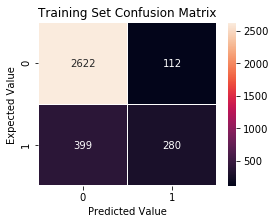

In [41]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc),
            annot=True,
            linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')

## Ranking Feature Importance

In [48]:
indices = np.argsort(rfc.feature_importances_)[::-1]

print('Feature ranking (top 10):')

for f in range(10):
    print(f'{f}. feature {indices[f]} {df3.columns[indices[f]]} ({round(rfc.feature_importances_[indices[f]],3)})')

Feature ranking (top 10):
0. feature 1 Critic_Score (0.326)
1. feature 0 Year_of_Release (0.163)
2. feature 191 Publisher_Nintendo (0.028)
3. feature 92 Publisher_Electronic Arts (0.021)
4. feature 19 Genre_Action (0.02)
5. feature 27 Genre_Shooter (0.019)
6. feature 9 Platform_PS2 (0.018)
7. feature 29 Genre_Sports (0.018)
8. feature 42 Publisher_Activision (0.015)
9. feature 10 Platform_PS3 (0.015)


# Which 2016 games can still become hits?

In [49]:
not_hit = df_copy[df_copy.Hit==0]
y = not_hit['Hit'].values
not_hit = not_hit.drop(['Hit'],axis=1)
X = not_hit.values

In [50]:
pred = rfc.predict_proba(X)

In [75]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df = df.dropna().reset_index(drop=True)
df2 = df[['Name','Platform','Genre', 'Publisher', 'Year_of_Release', 'Critic_Score', 'Global_Sales']]
dfb = df2[df2.Global_Sales<=1]
dfb.head()

,Name,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Global_Sales
1307,Ford Racing 2,PS2,Racing,Empire Interactive,2003.0,51.0,1.0
1308,NERF N-Strike Elite,Wii,Shooter,Electronic Arts,2009.0,67.0,1.0
1309,God of War: Ghost of Sparta,PSP,Action,Sony Computer Entertainment,2010.0,86.0,1.0
1310,SoulCalibur II,XB,Fighting,Namco Bandai Games,2003.0,92.0,1.0
1311,Dynasty Warriors 3: Xtreme Legends,PS2,Action,Tecmo Koei,2002.0,72.0,1.0


In [76]:
dfb.shape

(5518, 7)

In [77]:
pred.shape

(5518, 2)

In [78]:
pred

array([[0.964, 0.036],
       [0.82 , 0.18 ],
       [0.914, 0.086],
       ...,
       [0.984, 0.016],
       [0.988, 0.012],
       [0.962, 0.038]])

In [79]:
dfb['Hit_Probability'] = pred[:,1]

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
dfb= dfb[dfb.Year_of_Release==2016]
dfb.sort_values(by='Hit_Probability', ascending=False, inplace=True)
dfb = dfb[['Name', 'Platform', 'Hit_Probability']]

## Top 10 games from 2016 with highest probability of becoming hits

In [82]:
dfb[:10].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,Titanfall 2,XOne,0.844
1,Super Stardust Ultra VR,PS4,0.554
2,Dishonored 2,PS4,0.546
3,Overwatch,PC,0.518
4,EA Sports UFC 2,PS4,0.472
5,Call of Duty: Infinite Warfare,PC,0.451
6,Dishonored 2,XOne,0.430
7,One Piece: Burning Blood,PS4,0.404
8,XCOM 2,PS4,0.376
9,Plants vs. Zombies: Garden Warfare 2,PS4,0.350


## Top 10 games from 2016 with highest probability of becoming hits

In [83]:
dfb[:-11:-1].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,LEGO Marvel's Avengers,3DS,0.000
1,Valentino Rossi: The Game,PC,0.002
2,Sword Art Online: Hollow Realization,PSV,0.002
3,Pro Evolution Soccer 2017,PC,0.002
4,Sherlock Holmes: The Devil's Daughter,PC,0.002
5,Song of the Deep,PC,0.004
6,The Technomancer,PC,0.006
7,Assetto Corsa,XOne,0.006
8,Valentino Rossi: The Game,XOne,0.006
9,LEGO Marvel's Avengers,PS4,0.006
